In [60]:
import json
import glob

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
path = "../urbangrammar_samba/spatial_signatures/ai/nw/json/"

In [7]:
results = glob.glob(path + "*")

In [9]:
with open(results[0], "r") as f:
    result = json.load(f)

In [10]:
result

{'meta_n_class': '3',
 'meta_class_map': [['9_0', '9_1', '9_2', '9_4', '9_5', '2_0', '2_1', '2_2'],
  ['1_0', '3_0', '5_0', '6_0', '8_0'],
  ['0_0', '4_0', '7_0']],
 'meta_class_names': ['centres', 'periphery', 'countryside'],
 'meta_chip_size': 32,
 'model_name': 'efficientnet_pooling_256_3',
 'model_bridge': 'pooling',
 'model_toplayer': '256',
 'perf_model_accuracy_train': 0.7940552234649658,
 'perf_avg_prob_top_train': 0.7982783975515987,
 'perf_within_class_accuracy_train': [0.8625730872154236,
  0.8235910534858704,
  0.7674906849861145],
 'perf_within_class_avg_prob_top_train': [0.8791112899780273,
  0.8565965294837952,
  0.7488362193107605],
 'perf_confusion_train': [[295, 202, 22], [43, 3931, 1417], [4, 640, 4750]],
 'perf_model_accuracy_val': 0.7157643437385559,
 'perf_avg_prob_top_val': 0.7960902108413399,
 'perf_within_class_accuracy_val': [0.343137264251709,
  0.7138535976409912,
  0.7362145781517029],
 'perf_within_class_avg_prob_top_val': [0.8495033979415894,
  0.85321378

In [38]:
names = [i[52:-5] for i in results]

In [85]:
accuracy = pd.DataFrame(columns=["global"] + result["meta_class_names"], index=pd.MultiIndex.from_product([names, ["train", "val", "secret"]]))

In [86]:
for r in results:
    with open(r, "r") as f:
        result = json.load(f)
    
    accuracy.loc[(result["model_name"], "train")] = [result["perf_model_accuracy_train"]] + result["perf_within_class_accuracy_train"]
    accuracy.loc[(result["model_name"], "val")] = [result["perf_model_accuracy_val"]] + result["perf_within_class_accuracy_val"]
    accuracy.loc[(result["model_name"], "secret")] = [result["perf_model_accuracy_secret"]] + result["perf_within_class_accuracy_secret"]


In [87]:
sns.set_theme(style="whitegrid")

<AxesSubplot:title={'center':'train'}>

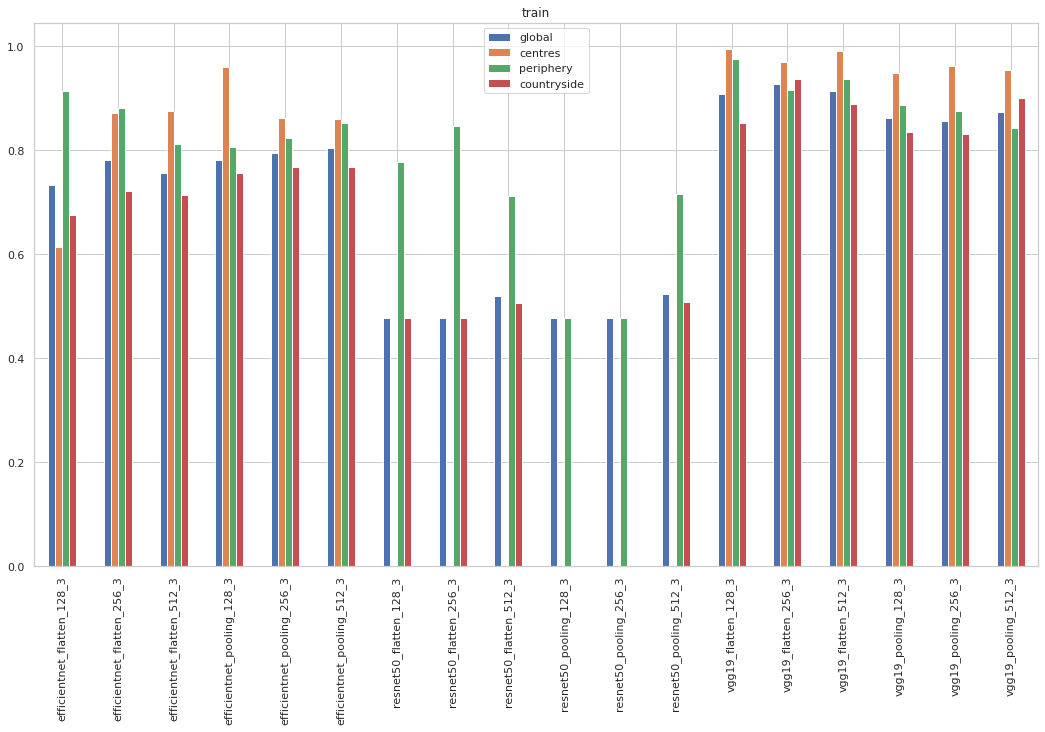

In [88]:
accuracy.xs('train', level=1).sort_index().plot.bar(figsize=(18, 10), title="train")

<AxesSubplot:title={'center':'validation'}>

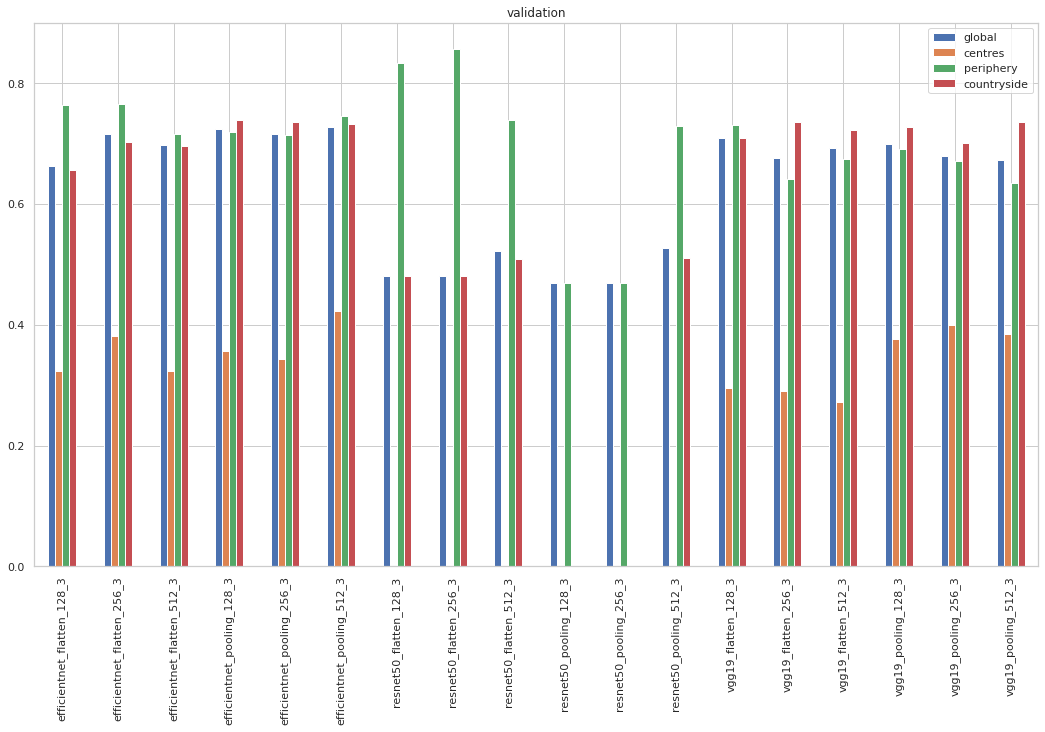

In [89]:
accuracy.xs('val', level=1).sort_index().plot.bar(figsize=(18, 10), title="validation")

<AxesSubplot:title={'center':'secret'}>

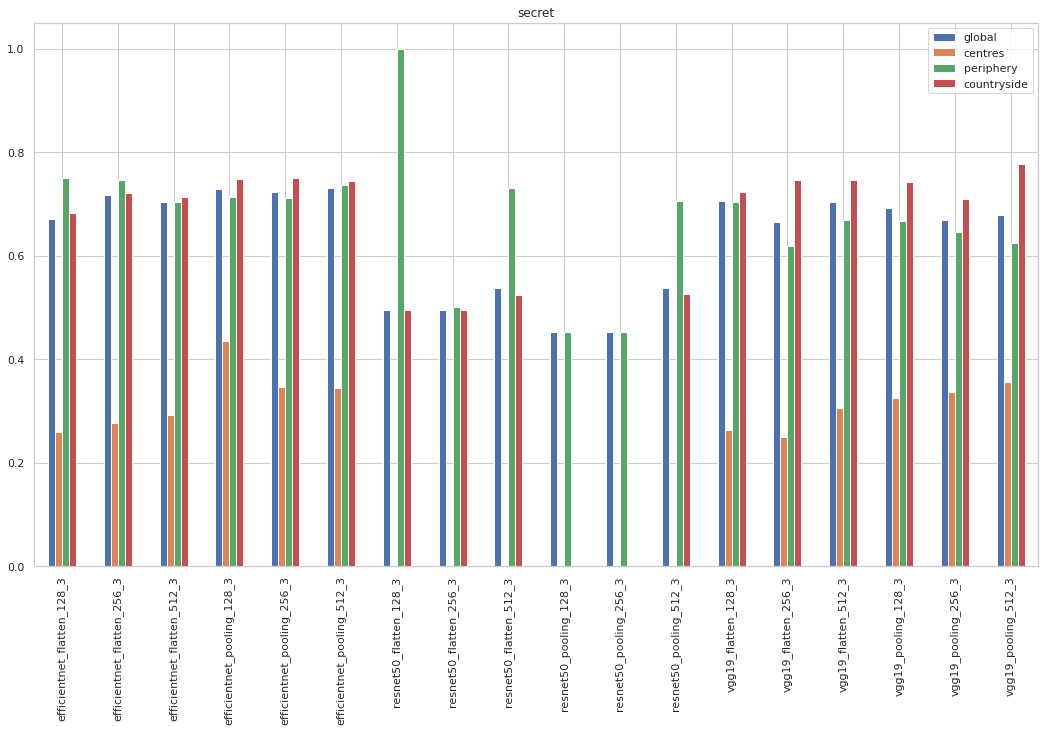

In [90]:
accuracy.xs('secret', level=1).sort_index().plot.bar(figsize=(18, 10), title="secret")